In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'Mall_Customers.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

DISPLAY DATASET

In [2]:
# Display dataset overview
print("Dataset Overview:\n", data.head())


Dataset Overview:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


EXTRACT RELEVANT FEATURES

In [3]:
# Extract relevant features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

ELBOW METHOD

In [4]:
# Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test for k = 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

PLOTTING

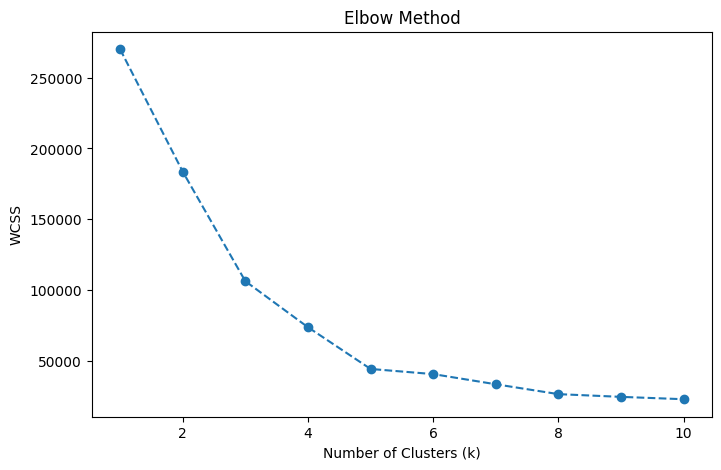

In [5]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

OPTIMAL K

In [6]:
# From the Elbow Curve, choose the optimal number of clusters (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

CLUSTER LABELS

In [7]:
# Add cluster labels to the dataset
data['Cluster'] = y_kmeans

VISUALIZATION

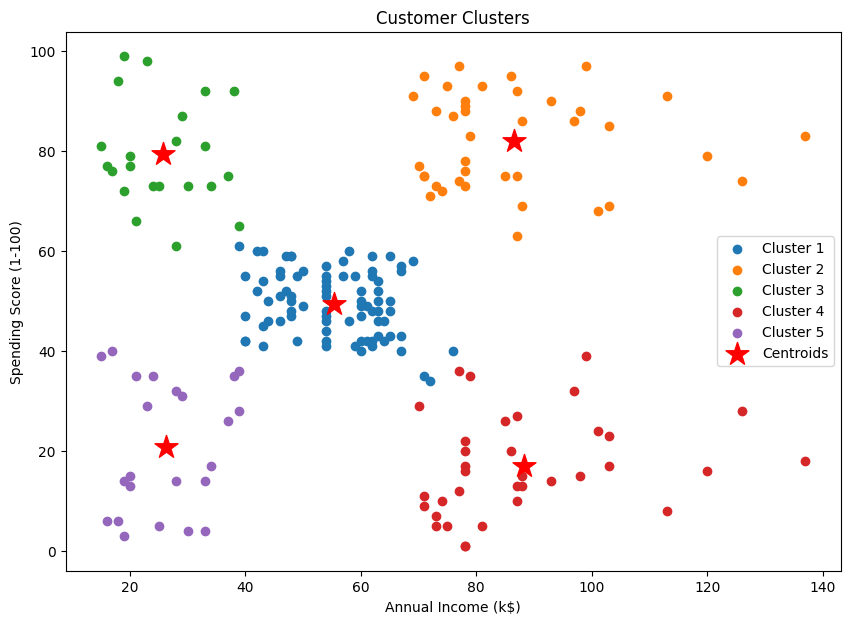

In [10]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
for i in range(optimal_k):
    plt.scatter(
        X[y_kmeans == i, 0], X[y_kmeans == i, 1],
        label=f'Cluster {i+1}'
    )
# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=300, c='red', marker='*', label='Centroids'
)
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()